In [1]:
# import all libraries
import pandas as pd
import datetime
import joblib
import pickle
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
import matplotlib as plt
from xgboost import plot_importance
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np

In [2]:
# Path settings


path_var = 1 

if (path_var == 1):
    filepath = '/home/docboy/Desktop/Option_Pricing/datasets/'
    modelpath = '/home/docboy/Desktop/Option_Pricing/pickles/'


else:
    filepath = '/home/sharan/Desktop/Option_Pricing/datasets/'
    mdoelpath = '/home/sharan/Desktop/Option_Pricing/pickles/'



# rel = filepath + 'REL_feature_set_COV_complete.csv'
# rel_ecdf = filepath + 'REL_feature_set_ECDF_complete.csv'
    
sbin = filepath + 'SBIN_feature_set_COV_complete_SCALED.csv'
sbin_ecdf = filepath + 'SBIN_feature_set_ECDF_complete_SCALED.csv'


In [3]:
# Set the automated variables + Plus drop all useless columns approach specific


###########################
###############################################

approach = 1                      #------------------>>> # Change value as needed

###############################################
###########################


if (approach == 1):
    feats = pd.read_csv(sbin_ecdf)
    print ('Approach var set to ECDF')
    
    dropNames = ['date', 'percentage','strike','spot','opPrice']
    
#     b_feats = pd.read_csv(sbin_ecdf)
    
else:
    feats = pd.read_csv(sbin)
    print ('Approach var set to :: '+ str(approach))
    
#     b_feats = pd.read_csv(bnfty)
    
    if (approach == 2):
        dropNames= ['date', 'percentage','strike','spot','opPrice','change_oi','ts_atr','prevOp','avg_atmError']
        
    else:
        dropNames= ['date', 'percentage','strike','spot','opPrice','ts_atr','change_oi']
        
###################

X=feats.iloc[:,:-1]
Y=feats.loc[:,'Target']
X = X.drop(dropNames, axis = 1)    



# b_X = b_feats.iloc[:,:-1]
# b_Y = b_feats.loc[:,'Target']
# b_X = b_X.drop(dropNames, axis = 1)    




Approach var set to ECDF


In [4]:
# Start the scaling process

featNames = list(X)  
scaler = RobustScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = featNames)


In [5]:
# # Save the scalar file

joblib.dump(scaler, modelpath + 'SCALER_SBIN_Expt' + str(approach) + '.model')
print("Scaler saved to path ::", modelpath + 'SCALER_SBIN_Expt' + str(approach) + '.model')

Scaler saved to path :: /home/docboy/Desktop/Option_Pricing/pickles/SCALER_SBIN_Expt1.model


In [6]:
# Split the train and test sets without random optimizations


feats['date'] = pd.to_datetime(feats['date'])
test=feats[(feats['date']>=datetime.date(2017,10,1))]
split_val = test.index[0]

# Removing the Random splits

X_train = X.iloc[0:split_val, :]
X_test = X.iloc[split_val:, :]
Y_train = Y.iloc[:split_val]
Y_test = Y.iloc[split_val:]
print ('X & Y_Dim of Train is', X_train.shape, Y_train.shape)
print ('X & Y_Dim of Test is', X_test.shape, Y_test.shape)

Y_test=Y_test.values
Y_train=Y_train.values



X & Y_Dim of Train is (3161, 22) (3161,)
X & Y_Dim of Test is (1538, 22) (1538,)


/home/docboy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """


In [7]:
# param =
model = XGBClassifier(n_estimators = 150, max_depth = 4, learning_rate = 0.15 , n_jobs=4)
%time model.fit(X_train, Y_train)
print(model)



CPU times: user 53.8 s, sys: 352 ms, total: 54.2 s
Wall time: 16.6 s
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=4,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [8]:
k = model.predict(X_test)

In [9]:
# Normalized Error Metric (NEM)

bin_width = 0.10666666666666667    # Note the uniform binning!!!!!!!!
dist_sum = 0
for i in range(len(k)):
    dist = abs(k[i] - Y_test[i])
    dist_sum = dist_sum + dist
    
print("NEM :: ", (dist_sum*bin_width)/len(Y_test))

NEM ::  0.44885999133073257


In [10]:
accuracy_score(Y_test, k)*100
# print(classification_report(Y_test, k))

12.028608582574773

In [11]:
# Saving the model
joblib.dump(model, modelpath + 'SBIN_Expt' + str(approach) + '.model')
print("Model saved to path ::", modelpath + 'SBIN_Expt_NEW' + str(approach) + '.model' )

Model saved to path :: /home/docboy/Desktop/Option_Pricing/pickles/SBIN_Expt_NEW1.model


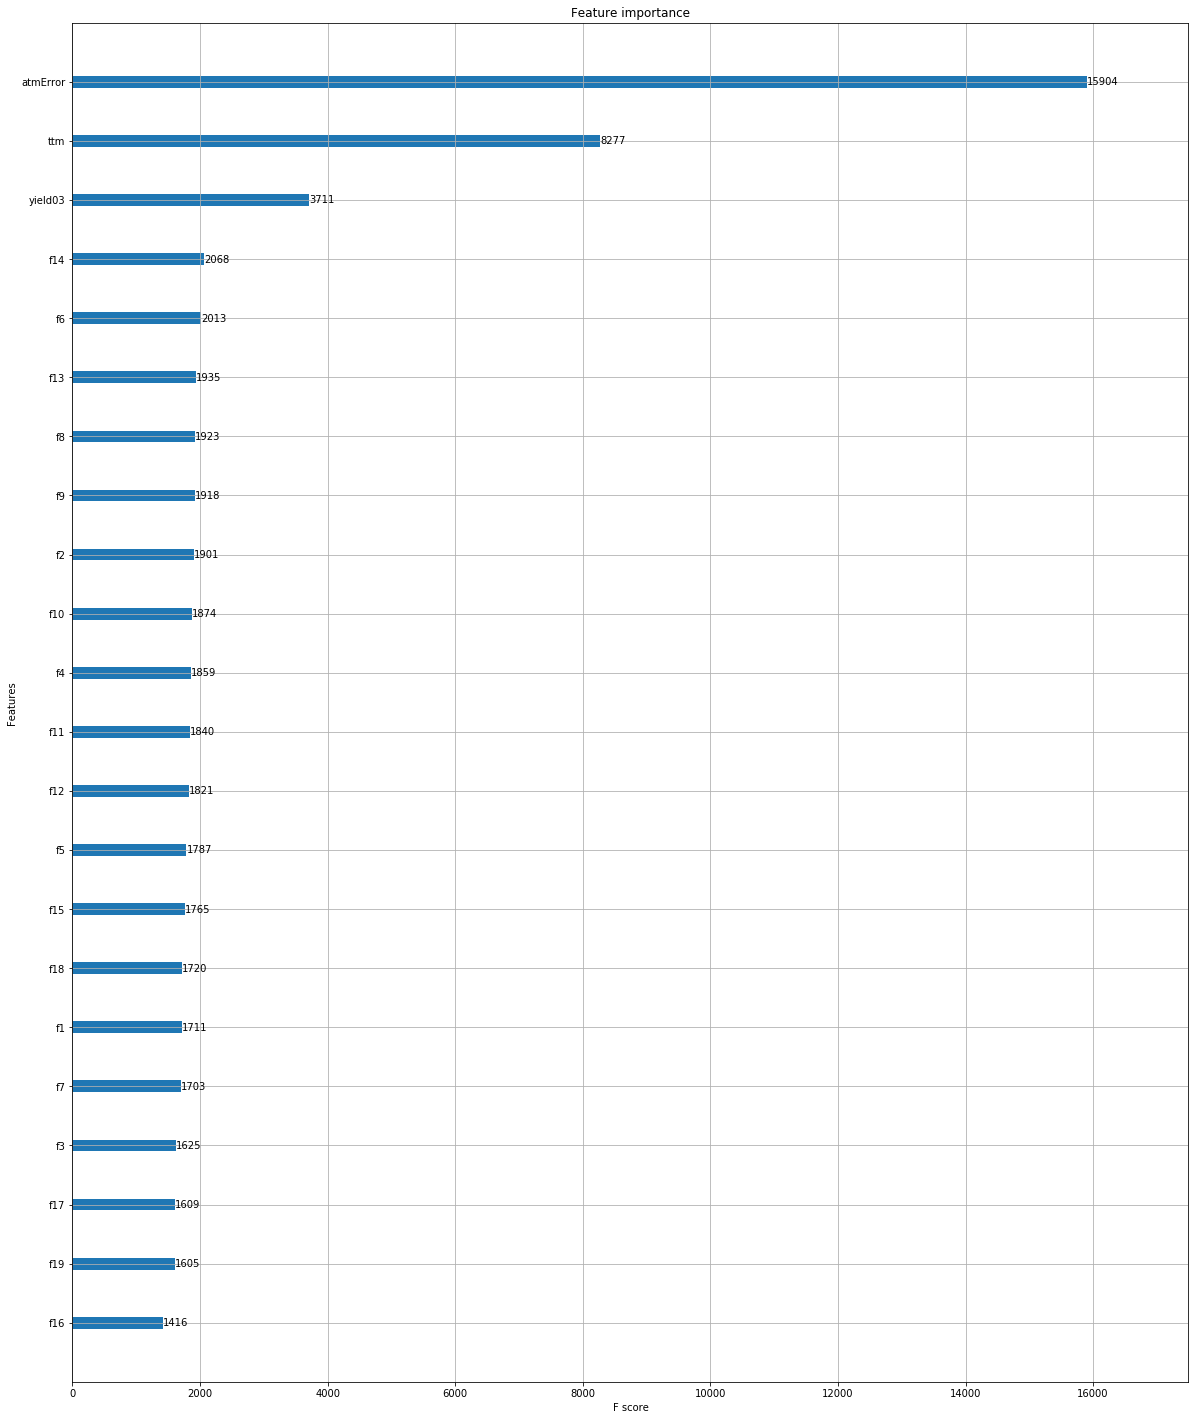

In [12]:
plt.rcParams['figure.figsize'] = [20, 25]
plot_importance(model)
plt.show()